https://towardsdatascience.com/introduction-to-mesa-agent-based-modeling-in-python-bcb0596e1c9a

https://mesa.readthedocs.io/en/latest/tutorials/intro_tutorial.html

https://notebook.community/projectmesa/mesa-examples/examples/ForestFire/.ipynb_checkpoints/Forest%20Fire%20Model-checkpoint

To install Mesa, simply:

$ pip install mesa https://mesa.readthedocs.io/en/latest/apis/space.html

In [1]:
import random

import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline
import mesa
print(mesa.__version__)
from mesa import Model, Agent
#from mesa.time import RandomActivation
from mesa.space import ContinuousSpace
#from mesa.time import RandomActivation

from ecoagclasses import *
from ecoagagents import *
from humanag import *


#from mesa.datacollection import DataCollector
#from mesa.batchrunner import BatchRunner

3.2.0


In [2]:
def draw_boids(model):
    x_vals = []
    y_vals = []
    t_vals=[]
    cols = []
    
    for boid in model.agents:
        atype=1.5
        x, y = boid.pos
        if boid.atype == 0:
            atype=1
            #cols.append(60)
            cols.append('red')
            #cols.append(1+atype)
        if boid.atype == 1:
            #cols.append(2+boid.fruit)
            cols.append('green')
            atype=10
        if boid.atype == 2:
            #cols.append(2+boid.honey)
            cols.append('blue')
            atype=50
        #cols.append(1)
        x_vals.append(x)
        y_vals.append(y)
        t_vals.append(100*atype)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.scatter(x_vals, y_vals, s=t_vals, c=cols, alpha=0.5)

In [16]:
#setupmodelparams
ecoag = EcoagParams(NP=5, width=200, height=200)
print(ecoag.NP)       # Access
ecoag.pseparation = 0.9     # Modify
ecoag.speed = 3

5


Next tasks
* define the functions which set up initialenvironment and initialsocial
* define minerals, factories, people, trees, plants, minerals, creatures
* set up rules for evolving and changing social parameters
* set up rules for changing environmental parameters

In [17]:
#setup environmental params
env = EnvironmentalParams(carbon_level=420, biodiversity_index=0.75)
print(env.soil_health)
env.carbon_level=10

0.7


In [18]:
#setup socialparams
soc = SocialParams(food_access=0.85, income_distribution=0.65)
print(soc.education_level)
soc.health_index=0.7

0.85


In [19]:



model = EcoagModel(4, 5, 8, 3, 3,3, 100, 100, speed=10, vision=100, pseparation=4, bseparation=1, qseparation=10,params=ecoag,envparams=env,socparams=soc)
model.space._build_agent_cache()



vision 5 speed 3
factories=3
create factory 0
create factory16
create factory 1
create factory17
create factory 2
create factory18
Agent points shape: (22, 2)
Agent points: [[47.28305967 15.34108456]
 [92.76736244 79.60133147]
 [62.95050427 53.60980798]
 [86.1011498  60.79228826]
 [42.88470548 24.49558879]
 [38.68304747 84.47629985]
 [52.48066364 19.37044628]
 [22.98302797 90.03288652]
 [74.32431734 90.66390483]
 [26.7682108  94.87113059]
 [31.27336748 95.63932362]
 [62.39911127 32.52156977]
 [11.36125193 78.18084228]
 [18.52262723 41.09641637]
 [91.9500746  39.05704137]
 [72.09129808 93.87632486]
 [57.33844874 33.00894339]
 [98.44593351 83.53586817]
 [37.36522631 11.8993327 ]
 [96.04156919 22.1679642 ]
 [42.92818204 37.9414405 ]
 [58.44548863 97.08174003]]


C:\Users\mikeg\proj\abm-examples\ecoag\ecoagclasses.py:198: UserWarning: Agent 1 is being placed with
place_agent() despite already having the position (47.28305966627002, 15.341084557598105). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agent(human_agent, pos)
C:\Users\mikeg\proj\abm-examples\ecoag\ecoagclasses.py:198: UserWarning: Agent 2 is being placed with
place_agent() despite already having the position (182.76736243609747, 169.60133147487048). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agent(human_agent, pos)
C:\Users\mikeg\proj\abm-examples\ecoag\ecoagclasses.py:198: UserWarning: Agent 3 is being placed with
place_agent() despite already having the position (62.9505042683842, 53.609807979872556). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.spac

In [20]:
for i in range(8):
    #if len(model.space._agent_points) == 0:
    #    print("Warning: No agents placed in space yet.")
    #else:
    model.step()
    print(model.time)
    #draw_boids(model)

human 2
human  random state flag=0
[94.9489639  81.66060685]   (92.76736243609747, 79.60133147487048)
plant 8
plant 6
creature 15
factory 17
plant 9
Neighbor ID: 16
tree 12
tree hooray more fruit
mineral 20
mineral hooray more fruit
human 1
human  random state flag=0
[47.28107001 18.3410839 ]   (47.28305966627002, 15.341084557598105)
tree 13
tree hooray more fruit
creature 16
Neighbor ID: 9
human 3
human  random state flag=0
[62.159836  56.5037402]   (62.9505042683842, 53.609807979872556)
tree 11
Neighbor ID: 10
tree hooray more fruit
factory 18
Neighbor ID: 2
mineral 22
mineral hooray more fruit
plant 10
Neighbor ID: 11
creature 14
plant 7
mineral 21
mineral hooray more fruit
human 5
human  random state flag=0
[45.01182336 22.38008187]   (42.88470548280458, 24.495588787871505)
factory 19
human 4
human  random state flag=0
[84.72270428 58.12772677]   (86.10114980295654, 60.792288258168426)
1
creature 15
human 3
human  random state flag=1
[62.85847938 53.58622457]   (62.159835998456515,

In [8]:
#see ecoagutils and dictionary routine in humans
from ecoagutils import *
filename="humans.json"
# During simulation

humlist=[]
for boid in model.agents:
    if boid.atype==0:
        humlist.append(boid)

save_humans_to_file(humlist,filename)

# Later or in a new model
loaded_humans = load_humans_from_file(model,filename)
for agent in loaded_humans:
    model.agents.add(agent)
    model.space.place_agent(agent, agent.pos)

AttributeError: 'creature' object has no attribute 'to_dict'

In [ ]:
# Create parameter instances
filename="params.json"
env = EnvironmentalParams(carbon_level=420)
soc = SocialParams(food_access=0.95)
ecoag = EcoagParams(NP=50, width=200, height=200)

# Save to file
save_params_to_file(env, soc, ecoag,filename)

# Load from file
env_loaded, soc_loaded, ecoag_loaded = load_params_from_file(filename)
print(env_loaded.carbon_level, soc_loaded.food_access, ecoag_loaded.NP)

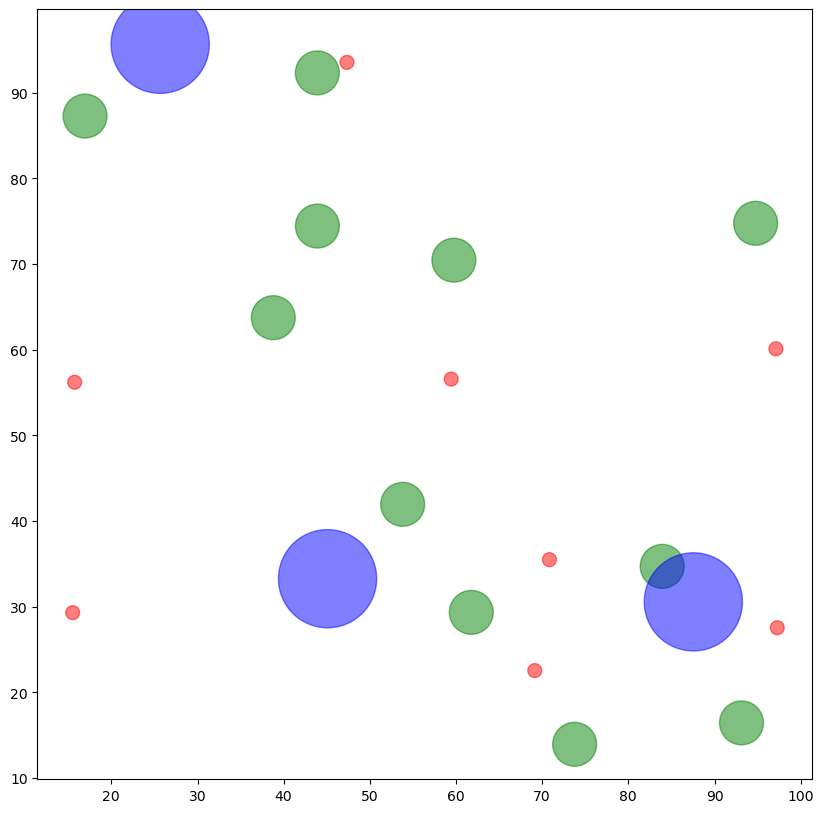

In [14]:
draw_boids(model)

In [17]:

for boid in model.agents:
            if boid.atype == 0:
                print(boid.honey, boid.fruit, boid.speed)       

In [7]:
for boid in model.schedule.agents:
            if boid.atype == 1:
                print(boid.pollen)

-5
5
-5
-5
-5
-5
-5
5
-5
-5


In [21]:
for boid in model.agents:
            if boid.atype == 2:
                print(boid.honey,boid.proccessedfood)

5 5
5 5
5 5


In [9]:
for boid in model.schedule.agents:
            if boid.atype == 0:
                x,y=boid.pos
                print(x, y, boid.speed)    

86.0 10.61165039434367 1
93.41199095555467 57.05701477845941 1
34.0182029563196 50.841701486805256 1
97.34753371497308 15.512680154030951 1
88.19975444619061 13.467449776144406 1
63.51014157615161 59.09131652739412 1
71.29832229075087 94.32677107432647 1
25.26476746101581 41.101505530721454 1
46.698725383023245 38.339052704865715 1
58.649054646793495 53.74048041414465 1
95.4791078685538 82.54724901222835 1
85.5364256717045 31.787644886721807 1
86.42930857309331 10.851713076486988 1
13.740113161244285 92.8815222621944 1
53.6552296376006 36.9635144617337 1
37.788178795960896 93.41164308714875 1
25.042012589379496 41.03682660091172 1
65.484289665183 86.77325310280725 1
54.87649539414949 72.27325090591842 1
34.0027081703598 89.83215206032166 1
33.717114490269495 90.87622291337239 1
29.00547952727261 45.43560636844028 1
34.39692055432302 91.0823584161402 0
61.49922255782889 84.40251873356523 1
78.99752853072654 76.0491092851155 1
86.97971632018648 11.281020066650143 1
57.319652784559615 49.

In [24]:
x_vals = []
y_vals = []
t_vals=[]
cols = []
    
for boid in model.agents:
    x, y = boid.pos
    if boid.atype == 0:
        atype=1
        cols.append(1+atype)
    if boid.atype == 1:
        cols.append(2+boid.fruit)
        atype=10
    if boid.atype == 2:
        cols.append(2+boid.honey)
        atype=50
    #cols.append(1)
    x_vals.append(x)
    y_vals.append(y)
    t_vals.append(100*atype)

In [23]:
np.concatenate([x_vals],[y_vals])


TypeError: 'list' object cannot be interpreted as an integer

In [25]:
xp=np.array([])
yp=np.array([])
for boid in model.schedule.agents:
    x, y = boid.pos
    xp = np.append(xp, x)
    yp = np.append(yp, y)

upos=[xp', yp']

SyntaxError: invalid syntax (1911624904.py, line 8)

In [384]:
print(xp),print(yp)

[60.98491655 86.06967877 94.50490232 63.34439164 60.86736786 86.27730285
 80.18166032 68.86668339 81.99779804 16.46105555 11.98049194 63.54054064
 36.28971892 45.38581678 34.37882036 66.26496313 88.22426832 80.76565109
 84.84641741 84.21448181 47.74040648 45.31644561 47.9122749  62.25414651
 65.1842734  64.49966726 94.44013924 73.56861475 88.46127998 66.14024921
 29.37008847 90.44195964 63.91626771 54.08040988 63.43602876 66.42256169
 81.39897428 87.08778866 98.23303648 43.84140576 65.36538269 57.60422419
 50.33886146 45.9176299  89.16104876 87.49743922 48.19022461 54.96446741
 62.58600998 64.79956529 23.53790587 80.3200215  99.92684553 95.80877619
 41.55382831 50.32543737 17.60624557 96.98699016 44.95016572 47.12791639
 84.83800708 60.76364483 38.90418456]
[65.00996201 69.39864487 21.21414921 63.12816794 17.23786452 63.10306674
 70.46387194 71.38886705 75.82166784 56.33726181 90.93576008 20.89855732
 67.45504697 89.08713085 18.7028882  99.37517226 69.31790825 70.2985228
 62.6804145  6

(None, None)

In [388]:
print(upos)

[array([60.98491655, 86.06967877, 94.50490232, 63.34439164, 60.86736786,
       86.27730285, 80.18166032, 68.86668339, 81.99779804, 16.46105555,
       11.98049194, 63.54054064, 36.28971892, 45.38581678, 34.37882036,
       66.26496313, 88.22426832, 80.76565109, 84.84641741, 84.21448181,
       47.74040648, 45.31644561, 47.9122749 , 62.25414651, 65.1842734 ,
       64.49966726, 94.44013924, 73.56861475, 88.46127998, 66.14024921,
       29.37008847, 90.44195964, 63.91626771, 54.08040988, 63.43602876,
       66.42256169, 81.39897428, 87.08778866, 98.23303648, 43.84140576,
       65.36538269, 57.60422419, 50.33886146, 45.9176299 , 89.16104876,
       87.49743922, 48.19022461, 54.96446741, 62.58600998, 64.79956529,
       23.53790587, 80.3200215 , 99.92684553, 95.80877619, 41.55382831,
       50.32543737, 17.60624557, 96.98699016, 44.95016572, 47.12791639,
       84.83800708, 60.76364483, 38.90418456]), array([65.00996201, 69.39864487, 21.21414921, 63.12816794, 17.23786452,
       63.10306

In [27]:
    xp, yp = np.array([]), np.array([])
    for boid in model.agents:
        x, y = boid.pos
        if boid.atype == 0:
            atype=1
            cols.append(1+atype)
        if boid.atype == 1:
            cols.append(2+boid.fruit)
            atype=10
        if boid.atype == 2:
            cols.append(2+boid.honey)
            atype=50
        #cols.append(1)

        x_vals.append(x)
        y_vals.append(y)
        t_vals.append(100*atype)
        xp = np.append(xp, x)
        yp = np.append(yp, y)


In [2]:
print(np.random.random(1))

[0.65515311]
